In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


<br>
<br>

# 데이터 로드 / 전처리

In [16]:
# 데이터셋 디렉터리 경로
dataset_dir = './dataset/caltech101'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

# 사진 크기
image_width = 100
image_height = 100

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')

# 검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')

# 테스트셋 제너레이터
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')


Found 1800 images belonging to 10 classes.
Found 600 images belonging to 10 classes.
Found 600 images belonging to 10 classes.


이전 예제까지는 케라스에 내장된 데이터셋을 바로 로드하였습니다. 이번에는 실제 JPG 파일로 저장되어 있는 사진들을 사용하겠습니다. 먼저 사진 파일을 벡터로 변환해야 하는데, 케라스의 ImageDataGenerator가 이런 과정을 자동으로 해줍니다. 

훈련셋, 검증셋, 테스트셋 3개의 디렉토리마다 각각 별도의 제너레이터를 생성합니다. 그리고 target_size로 이미지의 크기를 통일합니다. batch_size는 한 번에 가져오는 데이터 배치의 크기입니다. 사진이 10개의 라벨로 구분되어 있으므로 class_mode는 'categorical'로 설정합니다. 이진 분류일 경우는 'binary'입니다.
<br>
<br>
<br>

In [3]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

for문을 사용하여 제너레이터에서 배치를 가져옵니다. 처음에는 중복없이 데이터를 추출하고, 데이터셋의 모든 항목들을 다 반환하였을 경우에는 다시 처음부터 시작합니다. 이렇게 무한히 배치를 생성할 수 있습니다.
<br>
<br>
<br>

In [4]:
# 데이터 배치의 크기
data_batch.shape


(30, 100, 100, 3)

MNIST는 흑백이어서 채널이 1개였지만, 여기서는 RGB 3개 채널이 존재합니다.
<br>
<br>
<br>

In [5]:
# 라벨 배치의 크기
labels_batch.shape


(30, 10)

In [6]:
# 첫 번째 데이터 배치 출력
data_batch[0]


array([[[1.        , 0.9960785 , 0.9921569 ],
        [0.9960785 , 0.9960785 , 1.        ],
        [0.25490198, 0.3803922 , 0.43137258],
        ...,
        [0.18039216, 0.28235295, 0.34117648],
        [0.22352943, 0.3254902 , 0.38431376],
        [0.24705884, 0.3372549 , 0.40000004]],

       [[1.        , 0.9960785 , 0.9921569 ],
        [0.9960785 , 0.9960785 , 1.        ],
        [0.27058825, 0.39607847, 0.44705886],
        ...,
        [0.20784315, 0.29411766, 0.34509805],
        [0.15294118, 0.2392157 , 0.2901961 ],
        [0.17254902, 0.24705884, 0.3019608 ]],

       [[1.        , 0.9960785 , 0.9921569 ],
        [0.9960785 , 0.9960785 , 1.        ],
        [0.25882354, 0.37647063, 0.41960788],
        ...,
        [0.16862746, 0.2392157 , 0.2784314 ],
        [0.13725491, 0.20784315, 0.24705884],
        [0.15686275, 0.22352943, 0.2627451 ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 0.9843138 ],
        [0.4431373 , 0

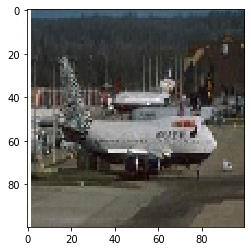

In [7]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()


In [8]:
# 첫 번째 라벨 배치 출력
labels_batch[0]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list


{'airplane': 0,
 'bonsai': 1,
 'car': 2,
 'chandelier': 3,
 'face': 4,
 'ketch': 5,
 'leopard': 6,
 'motorbike': 7,
 'turtle': 8,
 'watch': 9}

In [10]:
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list


{0: 'airplane',
 1: 'bonsai',
 2: 'car',
 3: 'chandelier',
 4: 'face',
 5: 'ketch',
 6: 'leopard',
 7: 'motorbike',
 8: 'turtle',
 9: 'watch'}

In [11]:
# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]


'airplane'

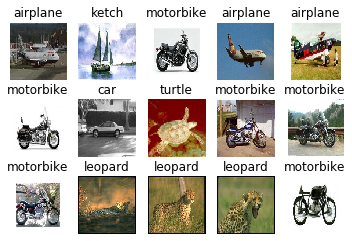

In [12]:
# 출력할 크기 설정
rows = 3
columns = 5

# 사진과 라벨 이름을 목록으로 출력
for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)
    

<br>
<br>

# 모델 생성

In [13]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))   

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['acc'])    
    
    return model

input_shape에서 마지막 파라미터가 RGB채널의 3이라는게 이전 MNIST 예제와 다릅니다. 그리고 Flatten() 뒤에 Dropout()을 추가하여 과대적합에 대비하였습니다. 0.5의 확률로 임의의 신경망 연결을 끊어서 일반화 능력을 높입니다.

<br>
<br>

# 훈련 및 평가

제너레이트를 입력으로 사용할 경우 fit_generator() 함수로 훈련을 합니다. steps_per_epoch은 에폭 당 제너레이트에서 배치를 얻는 횟수입니다. batch_size가 30이기 때문에, 30x60=1800으로 전체 훈련셋 개수만큼 학습을 합니다. validation_steps 역시 30x20=600으로 검증셋 개수가 되도록 설정합니다.
<br>
<br>
<br>

In [14]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit_generator(train_generator,
                              steps_per_epoch=60,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=20)


Epoch 1/10
60/60 [==============================] - 10s 163ms/step - loss: 1.4841 - acc: 0.5306 - val_loss: 1.1306 - val_acc: 0.7000
Epoch 2/10
60/60 [==============================] - 2s 29ms/step - loss: 0.4927 - acc: 0.8533 - val_loss: 0.3806 - val_acc: 0.8867
Epoch 3/10
60/60 [==============================] - 2s 31ms/step - loss: 0.2814 - acc: 0.9139 - val_loss: 0.5581 - val_acc: 0.9050
Epoch 4/10
60/60 [==============================] - 2s 31ms/step - loss: 0.2059 - acc: 0.9378 - val_loss: 0.0354 - val_acc: 0.9200
Epoch 5/10
60/60 [==============================] - 2s 32ms/step - loss: 0.1147 - acc: 0.9656 - val_loss: 1.2931 - val_acc: 0.7917
Epoch 6/10
60/60 [==============================] - 2s 32ms/step - loss: 0.0800 - acc: 0.9744 - val_loss: 0.0041 - val_acc: 0.9433
Epoch 7/10
60/60 [==============================] - 2s 32ms/step - loss: 0.0731 - acc: 0.9806 - val_loss: 0.7344 - val_acc: 0.8583
Epoch 8/10
60/60 [==============================] - 2s 31ms/step - loss: 0.0394 -

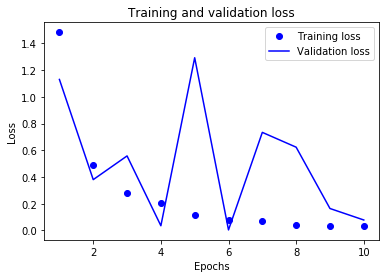

In [15]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


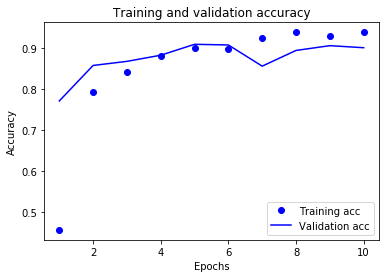

In [16]:
acc = history.history['acc']           # 훈련 정확도
val_acc = history.history['val_acc']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


이번 예제부터는 과대적합이 되기 전 에폭으로 다시 학습을 진행하지 않겠습니다. 훈련 시간이 너무 오래 걸리기 때문에 편의상 생략하지만, 실제 문제에서는 반드시 이런 과정이 필요합니다.

검증 정확도가 최고 91% 나왔습니다.
<br>
<br>
<br>

In [17]:
# 모델 저장
model.save('./model/image_cnn_model.h5')

<br>
<br>

# 테스트셋 확인

In [18]:
# 저장된 모델 파일 로드
model = models.load_model('./model/image_cnn_model.h5')

In [19]:
# 테스트셋 평가
results = model.evaluate_generator(test_generator)
results


[0.7196231044828891, 0.876666659116745]

테스트셋의 정확도가 87% 입니다.
<br>
<br>
<br>

In [20]:
# 테스트셋 예측
results = model.predict_generator(test_generator)
results


array([[2.1284591e-29, 6.0359672e-32, 1.7846914e-32, ..., 4.5144713e-26,
        6.1689970e-26, 2.0063233e-16],
       [2.5952547e-14, 5.0700816e-10, 5.3486255e-16, ..., 7.4284929e-09,
        1.5291343e-08, 1.4847143e-07],
       [4.4096301e-31, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0768090e-36, 0.0000000e+00],
       ...,
       [2.5792619e-07, 6.7825727e-05, 2.5979657e-10, ..., 5.4834873e-11,
        5.9686699e-03, 4.9129863e-05],
       [1.0000000e+00, 7.4795466e-16, 1.5747439e-10, ..., 2.2498481e-09,
        1.2630474e-09, 6.2245418e-13],
       [1.0000000e+00, 3.3806369e-21, 2.4164274e-22, ..., 1.5591137e-17,
        7.9971686e-20, 2.1259949e-19]], dtype=float32)

테스트셋을 예측해보면 10차원의 벡터에 softmax로 나온 확률값이 들어있습니다. 이 중에서 가장 높은 값의 위치가 바로 이미지의 라벨을 가리킵니다.
<br>
<br>
<br>

In [21]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results


array([4, 5, 7, 7, 0, 0, 9, 0, 6, 4, 7, 7, 9, 4, 0, 7, 8, 7, 7, 6, 4, 7,
       7, 7, 9, 0, 4, 1, 0, 0, 3, 3, 0, 0, 7, 7, 0, 0, 4, 2, 4, 4, 6, 6,
       7, 5, 7, 4, 0, 0, 0, 7, 7, 0, 6, 1, 0, 7, 8, 0, 0, 3, 0, 8, 0, 7,
       4, 4, 4, 0, 7, 7, 7, 7, 4, 8, 7, 5, 7, 0, 7, 7, 7, 5, 6, 4, 9, 8,
       6, 0, 7, 3, 0, 5, 9, 3, 3, 6, 2, 0, 0, 0, 0, 7, 7, 4, 7, 7, 0, 4,
       2, 4, 7, 9, 7, 2, 7, 2, 6, 0, 1, 4, 7, 7, 7, 8, 7, 0, 0, 5, 0, 9,
       0, 7, 4, 6, 1, 0, 8, 7, 4, 0, 0, 7, 0, 0, 7, 0, 7, 6, 7, 0, 6, 0,
       0, 3, 0, 8, 7, 7, 3, 7, 6, 0, 0, 0, 1, 0, 6, 0, 0, 4, 4, 0, 7, 4,
       0, 6, 0, 7, 4, 9, 4, 4, 7, 7, 7, 2, 8, 0, 0, 4, 7, 7, 0, 7, 0, 2,
       0, 4, 0, 4, 6, 2, 0, 4, 1, 7, 4, 7, 8, 7, 7, 2, 0, 7, 4, 0, 7, 4,
       4, 0, 1, 1, 9, 7, 0, 7, 7, 4, 7, 7, 4, 7, 7, 8, 0, 0, 0, 7, 7, 0,
       8, 4, 7, 0, 2, 7, 7, 5, 1, 0, 7, 8, 8, 7, 0, 0, 0, 0, 9, 0, 7, 7,
       7, 7, 8, 6, 7, 8, 2, 0, 8, 7, 7, 8, 1, 0, 7, 9, 6, 8, 4, 7, 4, 3,
       3, 0, 0, 0, 7, 0, 2, 0, 4, 0, 0, 0, 2, 9, 8,

argmax를 사용하여 라벨의 숫자로 변환하였습니다.
<br>
<br>
<br>

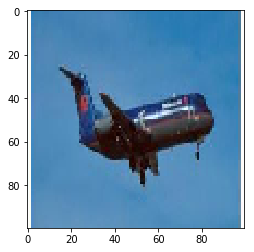

In [22]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break
    
# 테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()


In [23]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]


'airplane'

테스트셋 배치의 첫 번째 이미지와 예측한 라벨이 일치합니다.